# Christian Campbell

# Using Data to Improve MLB Attendace

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [2]:
path = r"C:\Users\chris\Documents\Bellevue University\7 - Predictive Analytics\dodgers-2022.csv"
mlb_attendance = pd.read_csv(path)
mlb_attendance.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


##### Coverting column values into numbers

In [3]:
# Convert columns, values to numbers
# Define the mappings for the specified columns
mappings = {
    'NO': 0,
    'YES': 1,
    'Day': 0,
    'Night': 1,
    'Clear ': 0,
    'Cloudy': 1,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mappings to the specified columns
columns_to_map = ['bobblehead', 'cap', 'shirt', 'fireworks', 'day_night', 'skies', 'day_of_week']
mlb_df = mlb_attendance.copy()  # Create a copy of the original DataFrame

for column in columns_to_map:
    mlb_df[column] = mlb_df[column].replace(mappings)

mlb_df.head(20)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,2,Pirates,67,0,0,0,0,0,0
1,APR,11,29729,3,Pirates,58,1,1,0,0,0,0
2,APR,12,28328,4,Pirates,57,1,1,0,0,0,0
3,APR,13,31601,5,Padres,54,1,1,0,0,1,0
4,APR,14,46549,6,Padres,57,1,1,0,0,0,0
5,APR,15,38359,7,Padres,65,0,0,0,0,0,0
6,APR,23,26376,1,Braves,60,1,1,0,0,0,0
7,APR,24,44014,2,Braves,63,1,1,0,0,0,0
8,APR,25,26345,3,Braves,64,1,1,0,0,0,0
9,APR,27,44807,5,Nationals,66,0,1,0,0,1,0


##### Finding the mean of attendance

In [4]:
mean_attendance = mlb_df['attend'].mean()

print(f"The mean attendance is: {mean_attendance}")

The mean attendance is: 41040.07407407407


##### Finding unique values in the columns

In [5]:
# List of columns to find unique values
columns_of_interest = ["day_of_week", "opponent", "skies", "day_night", "cap", "shirt", "fireworks", "bobblehead"]

# Finds unique values in each specified column
unique_values = {col: mlb_df[col].unique() for col in columns_of_interest}

# Prints the unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'day_of_week': [2 3 4 5 6 7 1]
Unique values in column 'opponent': ['Pirates' 'Padres' 'Braves' 'Nationals' 'Giants' 'Rockies' 'Snakes'
 'Cardinals' 'Astros' 'Brewers' 'Angels' 'White Sox' 'Mets' 'Reds'
 'Phillies' 'Cubs' 'Marlins']
Unique values in column 'skies': [0 1]
Unique values in column 'day_night': [0 1]
Unique values in column 'cap': [0 1]
Unique values in column 'shirt': [0 1]
Unique values in column 'fireworks': [0 1]
Unique values in column 'bobblehead': [0 1]


In [6]:
print(mlb_df.dtypes)

month          object
day             int64
attend          int64
day_of_week     int64
opponent       object
temp            int64
skies           int64
day_night       int64
cap             int64
shirt           int64
fireworks       int64
bobblehead      int64
dtype: object


##### Analyzing attendance by day of the week

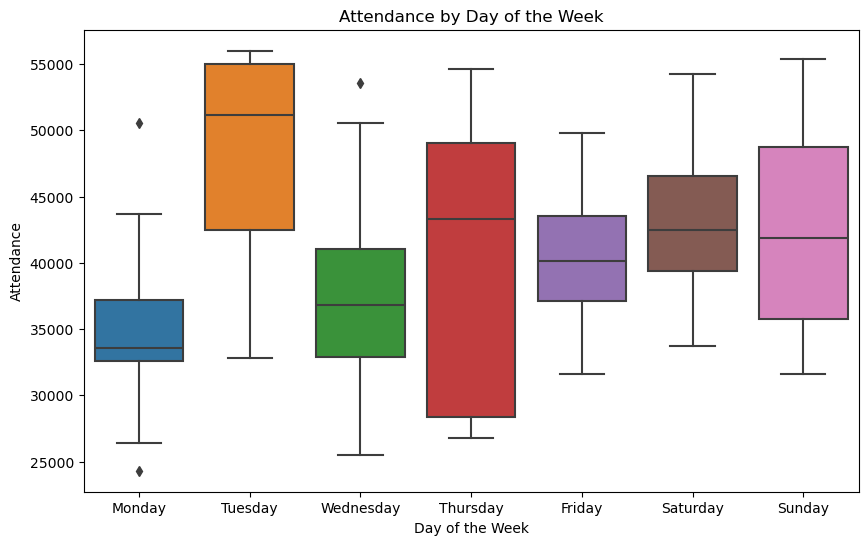

In [7]:
# Maps day_of_week to actual days for better readability
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
mlb_df['day_name'] = mlb_df['day_of_week'].map(day_map)

# Plots attendance by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_name', y='attend', data=mlb_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')
plt.show()

##### Analyzing attendance by Opponent

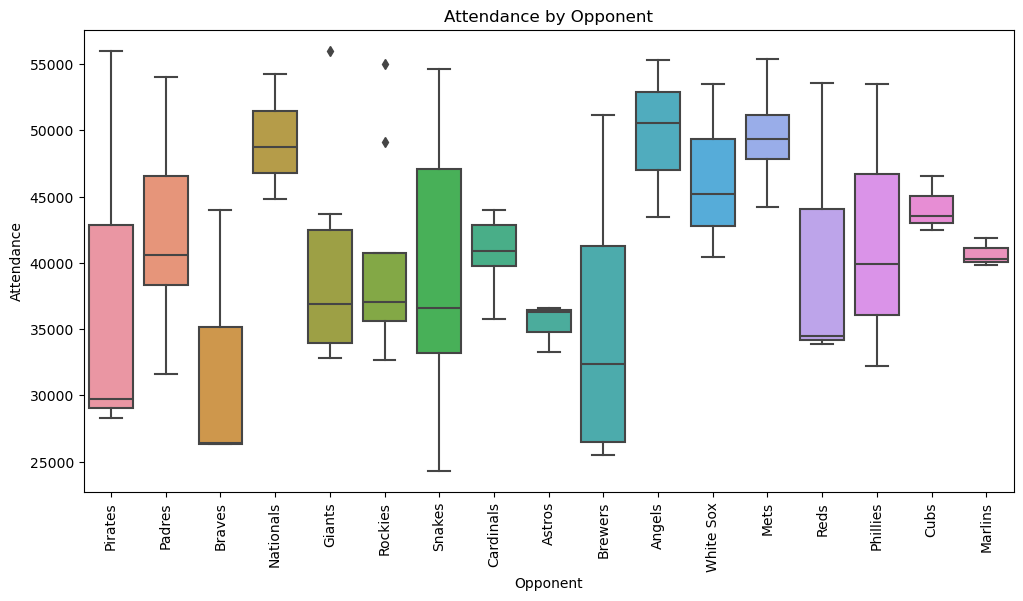

In [8]:
# Plots attendance by opponent
plt.figure(figsize=(12, 6))
sns.boxplot(x='opponent', y='attend', data=mlb_df)
plt.title('Attendance by Opponent')
plt.xlabel('Opponent')
plt.ylabel('Attendance')
plt.xticks(rotation=90)
plt.show()

##### Analyzing Attendance by Temperature

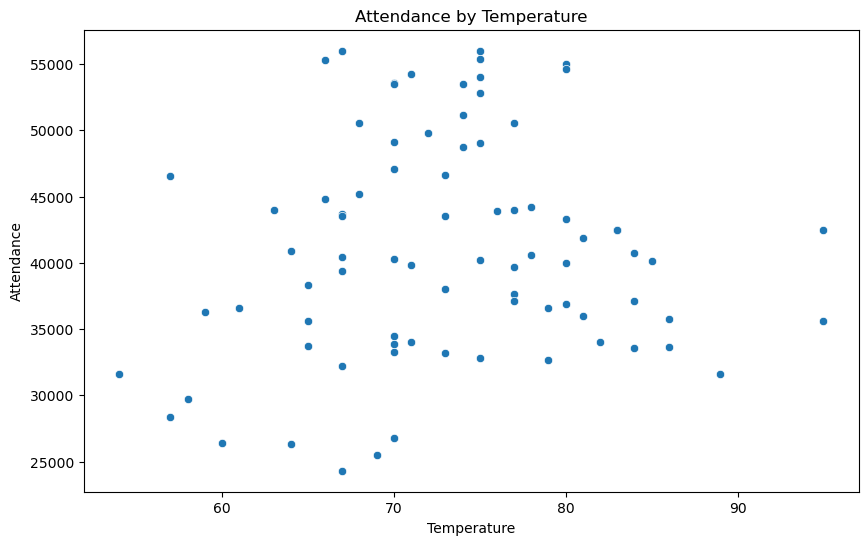

In [9]:
# Plots attendance by temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='attend', data=mlb_df)
plt.title('Attendance by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Attendance')
plt.show()

##### Analyzing Attendance by Promotional Events

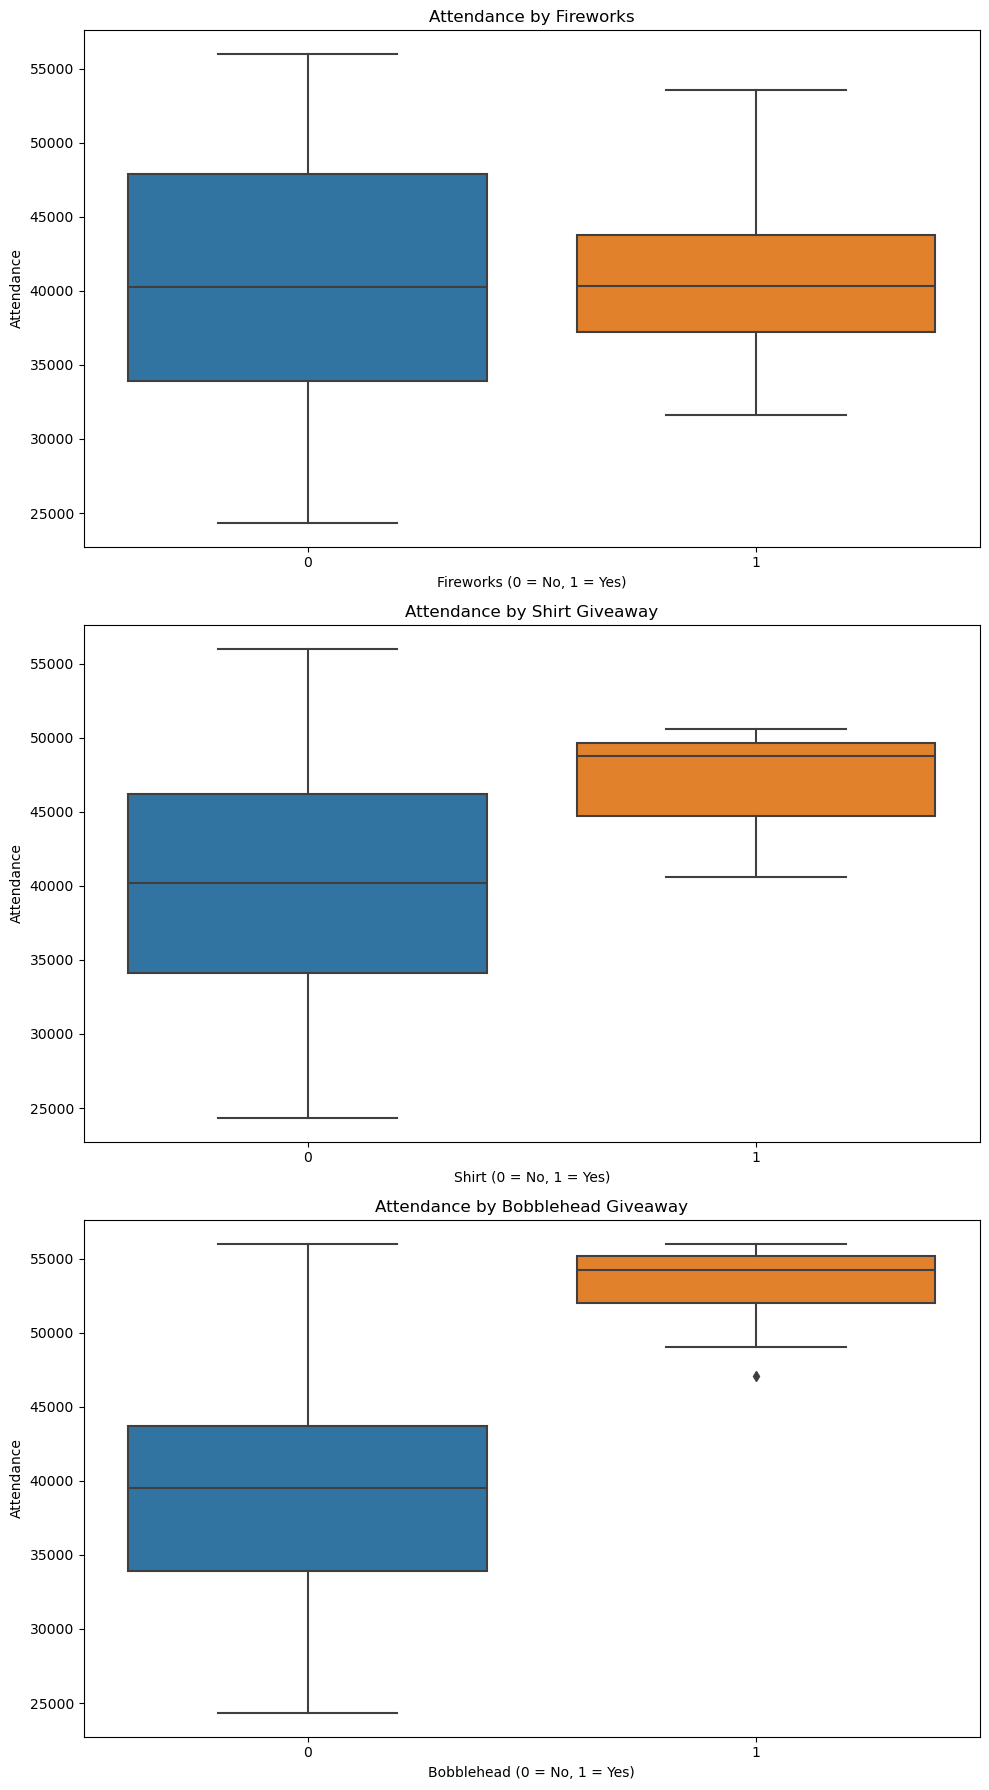

In [10]:
# Plots attendance by promotional events
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Fireworks
sns.boxplot(x='fireworks', y='attend', data=mlb_df, ax=axes[0])
axes[0].set_title('Attendance by Fireworks')
axes[0].set_xlabel('Fireworks (0 = No, 1 = Yes)')
axes[0].set_ylabel('Attendance')

# Shirt
sns.boxplot(x='shirt', y='attend', data=mlb_df, ax=axes[1])
axes[1].set_title('Attendance by Shirt Giveaway')
axes[1].set_xlabel('Shirt (0 = No, 1 = Yes)')
axes[1].set_ylabel('Attendance')

# Bobblehead
sns.boxplot(x='bobblehead', y='attend', data=mlb_df, ax=axes[2])
axes[2].set_title('Attendance by Bobblehead Giveaway')
axes[2].set_xlabel('Bobblehead (0 = No, 1 = Yes)')
axes[2].set_ylabel('Attendance')

plt.tight_layout()
plt.show()

##### OLS Regression Model

In [11]:
# OLS Regression Model
X = mlb_df[['day_of_week', 'temp', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = mlb_df['attend']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     6.925
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.00e-06
Time:                        17:01:57   Log-Likelihood:                -822.24
No. Observations:                  81   AIC:                             1662.
Df Residuals:                      72   BIC:                             1684.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.594e+04   8181.420      4.393      

##### Final insights and recomendations

Based on the OLS regression results, several key insights can be derived to recommend strategies for improving crowd attendance. Promotional events, particularly shirt and bobblehead giveaways, have a significant positive impact on attendance. The regression model shows that shirt giveaways can boost attendance by approximately 8,305 people, and bobblehead giveaways have an even more substantial effect, increasing attendance by around 15,680 people. Although fireworks nights show a positive trend in increasing attendance, this effect is not statistically significant.

The analysis suggests less significant effects from the day of the week, temperature, and sky conditions on attendance. The coefficients for these variables are not statistically significant, indicating that they have a weaker or negligible influence on the number of attendees. Similarly, the preference for day versus night games is not clear, as the regression results do not show a significant impact. Interestingly, cap giveaways appear to have a negative coefficient, suggesting they may not be effective in drawing larger crowds.

To enhance attendance, increasing the frequency of highly effective promotional events like bobblehead and shirt giveaways is recommended. These events should be heavily marketed to attract more fans and create a vibrant game-day atmosphere. While the day of the week and game timing do not show significant effects in this model, further experiments or surveys could reveal preferences among different fan segments. Weather factors, such as temperature and sky conditions, seem less critical and thus should not be a primary concern in scheduling games.